In [145]:
# WARNING: This cell *needs* to be run *first* for the rest of the notebook to work.
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the source file
source_file_path = '../data/raw/insurance.csv'

# Project Description

For this project, you will be investigating a medical insurance costs dataset in a .csv file using the Python skills that you've developed. This dataset and its parameters will seem familiar if you've done any of the previous Python projects in the data science path.

However, you're now tasked with working with the actual information in the dataset and performing your own independent analysis on real-world data! We will not be providing step-by-step instructions on what to do, but we will provide you with a framework to structure your exploration and analysis. For this project, you will be investigating a medical insurance costs dataset in a .csv file using the Python skills that you've developed. This dataset and its parameters will seem familiar if you've done any of the previous Python projects in the data science path.

# Project Objectives

- Work locally on your own computer
- Import a dataset into your program
- Analyze a dataset by building out functions or class methods
- Use libraries to assist in your analysis
- Optional: Document and organize your findings
- Optional: Make predictions about a dataset’s features based on your findings

# Personal Notes

This project has an emphasis on the exploratory part of the data analysis process.

# Project: U.S. Medical Insurance Costs

A dataset containing information on medical insurance costs for individuals in the United States was provided by Codecademy.
To learn about the dataset, I first want to explore the data and get a feel for what it contains.

The dataset will first be loaded into a dataframe using `pandas` a third-party library for data analysis and manipulation. I will also check the `head` of the dataframe and the `shape` (size and columns) of the dataframe.

In [146]:
main_df = pd.read_csv(source_file_path)
main_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [147]:
main_df.shape

(1338, 7)

# Cleanup

## Check for null or missing values

The first step in the cleanup is to check for any missing values.
If there are any missing values, we will need to drop them.
I don't want to jeopardize the integrity of the data by filling in missing values with a guess.

In [148]:
if main_df.isnull().values.any():
    print(main_df[main_df.isnull().any(axis=1)])
    main_df.dropna(inplace=True)
else:
    print('No null or missing values found')

No null or missing values found


## Check for duplicates

The next step in the cleanup is to check for any duplicate values.
If there are any duplicate values, we will need to drop them.
I will only drop one of the duplicate values, so that I can keep the other one.

In [149]:
if main_df.duplicated().any():
    print(main_df[main_df.duplicated()])
    main_df.drop_duplicates(inplace=True)
else:
    print('No duplicate values found')

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


## Post cleanup

After the cleanup, I want to know the size of the dataset again.

In [150]:
main_df.shape

(1337, 7)

# Understanding the data

To have a good dimension of the data, I will now use the `info` function on the `main_df` dataframe.

In [151]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## Interpretation

From the `info` function, I can see that there are 1337 rows and 7 columns. These columns possess the following data types:

| Column   | Data Type | Nullable |
|----------|-----------|----------|
| age      | int64     | non-null |
| sex      | object    | non-null |
| bmi      | float64   | non-null |
| children | int64     | non-null |
| smoker   | object    | non-null |
| region   | object    | non-null |
| charges  | float64   | non-null |

Additionally, Codecademy provided the following information about the dataset:
- There are no missing data.
- There are seven columns.
- Some columns are numerical while some are categorical.

## What I would change about the dataset

I would change the data type of `sex` and `smoker` fields to be a `bool`, `smallint`, or any other type of integer with a low-value rate. This should optimice the storage and also the performance of the dataset.

# Exploring the data

This section will be divided into 2 parts, Numerical and Categorical.
These parts will cover base statics as well as relations.

## Numerical Fields

Finding the average, median, mode and standard deviation of each numerical field is the first step I'm going to take on the exploration of the data.
Using the `describe` function from `pandas` I can get all the values I need, since it only works on numerical fields.

In [152]:
main_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Visualization

Since this is only an exploratory project, I will make some plots to visualize the data. This is merely demonstrative and was not an original parameter of the project.

I want to make 2 types of plots:
- A box plot for each numerical field.
- A histogram for each numerical field.

#### Box Plots

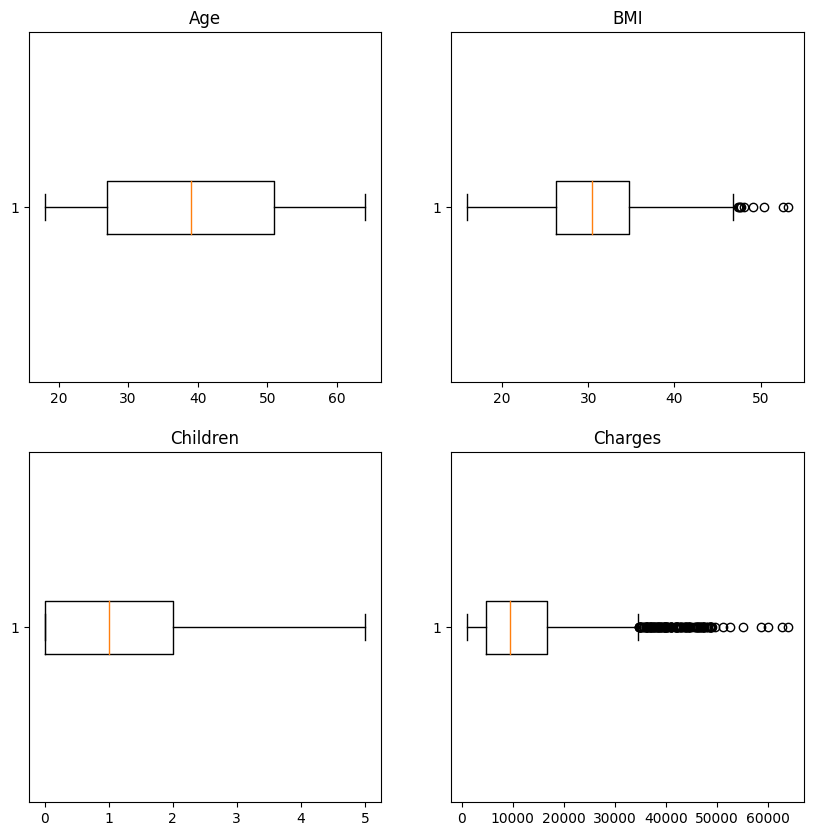

In [153]:
def create_box_plots_numerical_fields():
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    axes[0, 0].boxplot(main_df['age'], vert=False)
    axes[0, 0].set_title('Age')
    
    axes[0, 1].boxplot(main_df['bmi'], vert=False)
    axes[0, 1].set_title('BMI')
    
    axes[1, 0].boxplot(main_df['children'], vert=False)
    axes[1, 0].set_title('Children')
    
    axes[1, 1].boxplot(main_df['charges'], vert=False)
    axes[1, 1].set_title('Charges')
    
    plt.show()
    
create_box_plots_numerical_fields()

#### Histograms

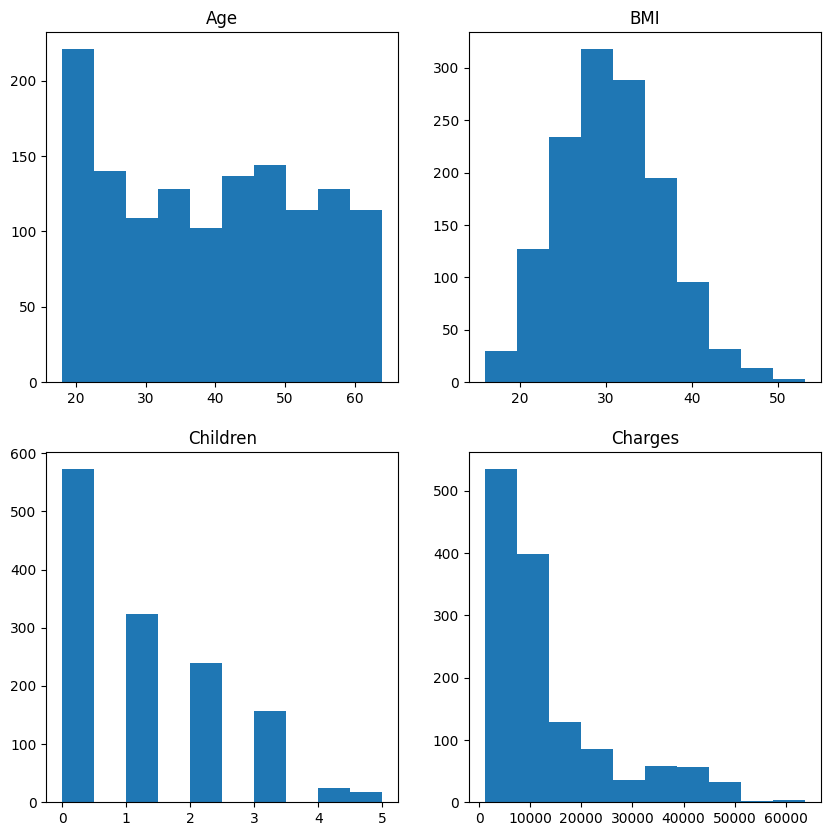

In [154]:
def create_histograms_numerical_fields():
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    axes[0, 0].hist(main_df['age'])
    axes[0, 0].set_title('Age')
    
    axes[0, 1].hist(main_df['bmi'])
    axes[0, 1].set_title('BMI')
    
    axes[1, 0].hist(main_df['children'])
    axes[1, 0].set_title('Children')
    
    axes[1, 1].hist(main_df['charges'])
    axes[1, 1].set_title('Charges')
    
    plt.show()
    
create_histograms_numerical_fields()

## Categorical Fields

Categorical fields are different, in the sense that their values can't be directly compared to each other.
For that reason, I'm going to explore the statistics of the different values for each categorical field.

### Unique field values

I will start by getting the different values for each categorical field

In [155]:
main_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [156]:
main_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [157]:
main_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Exploration

After finding the unique values for each field, now I can explore the data.
For this, I will also implement numpy functions.

For each unique value, I will get the following:
- The number of times it appears in the dataset.
- The percentage of times it appears in the dataset.

I will create a function that will return the information in the form of a DataFrame.

In [158]:
def explore_category(field_name):
    values = main_df[field_name].value_counts()
    total_values = values.sum()
    percentages = round(values / total_values * 100, 2)
    
    summary = pd.DataFrame({
        'Values': values,
        'Percentages': percentages
    })
    
    return summary

In [159]:
explore_category('sex')

,Values,Percentages
sex,,
male,675,50.49
female,662,49.51


In [160]:
explore_category('smoker')

,Values,Percentages
smoker,,
no,1063,79.51
yes,274,20.49


In [161]:
explore_category('region')

,Values,Percentages
region,,
southeast,364,27.23
southwest,325,24.31
northwest,324,24.23
northeast,324,24.23


### Visualization

I want to make visualizations for each categorical field too.
These visualizations will be in the form of pie charts, since the information they display is much simpler than the numerical fields.

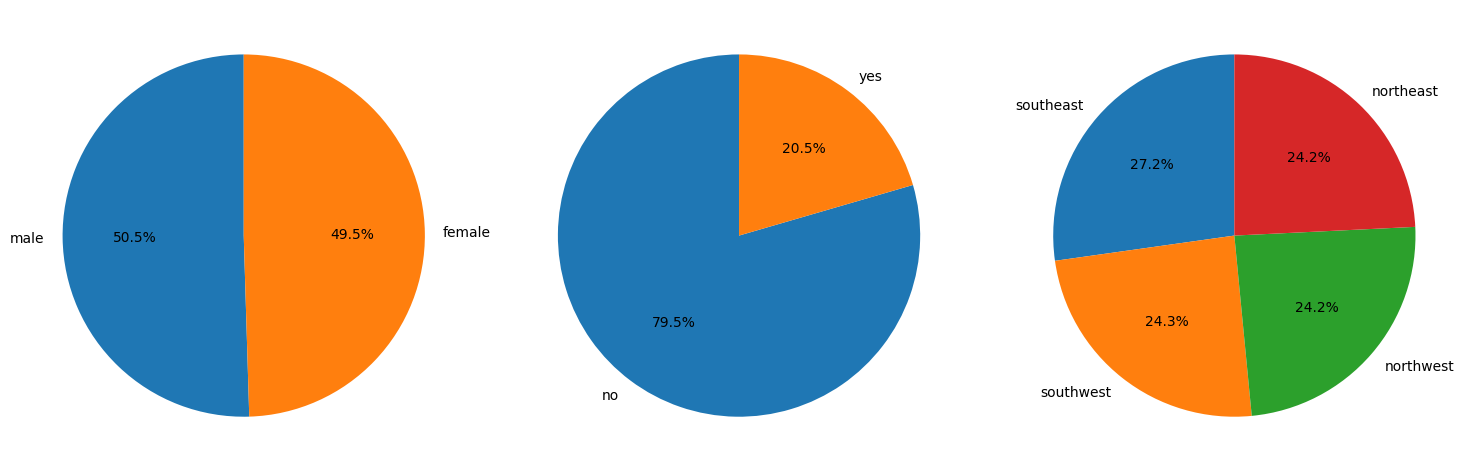

In [162]:
def create_pie_charts_categorical_fields():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
        
    axes[0].pie(explore_category('sex')['Values'], labels=explore_category('sex').index, autopct='%1.1f%%', startangle=90)
    axes[1].pie(explore_category('smoker')['Values'], labels=explore_category('smoker').index, autopct='%1.1f%%', startangle=90)
    axes[2].pie(explore_category('region')['Values'], labels=explore_category('region').index, autopct='%1.1f%%', startangle=90)
    
    plt.tight_layout()
    plt.show()
    
create_pie_charts_categorical_fields()

# Relationships

For the last part of the exploration, I want to find relationships between the different fields.
The relationships I will be looking for are for all the fields against the `charges` field.

This could give an insight in a inferential analysis of the data.